<a href="https://colab.research.google.com/github/min02yam/ADP/blob/main/220824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [23]:
require(magrittr)
require(urca)

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”


# 0.패키지 및 데이터 로드

In [1]:
system("gdown --id 1AbjEozu0z6RHgJrww9ch1RNvnSZf77z4")

In [11]:
load("tsdata.rdata")
ls()

[1] "birth"

In [21]:
birth

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


# 1. 데이터의 정상성을 확인하시오.

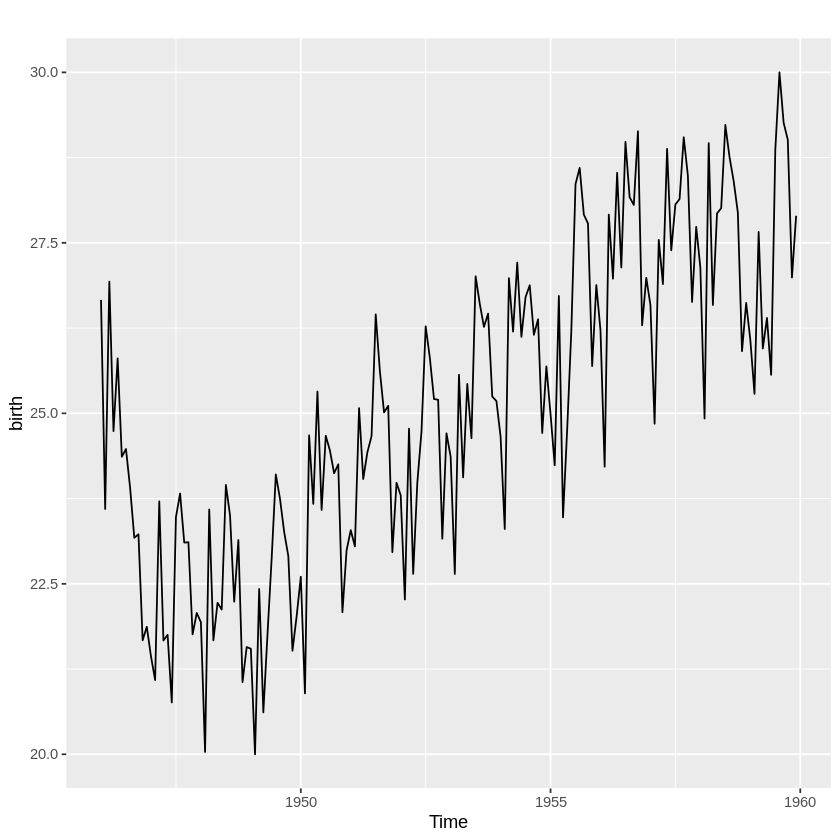

In [25]:
autoplot(birth)

비정상

# 2. ARIMA 모델 3가지 제시(근거)

In [33]:
#step1. 정상화
ur.kpss(birth) %>% summary #정상성 기각 확인
nsdiffs(birth, alpha = 0.05 ) # 차분 1회 필요
diff(birth) %>% ur.kpss %>% summary # 확인
diff= diff(birth)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 2.7644 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] 1


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0735 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


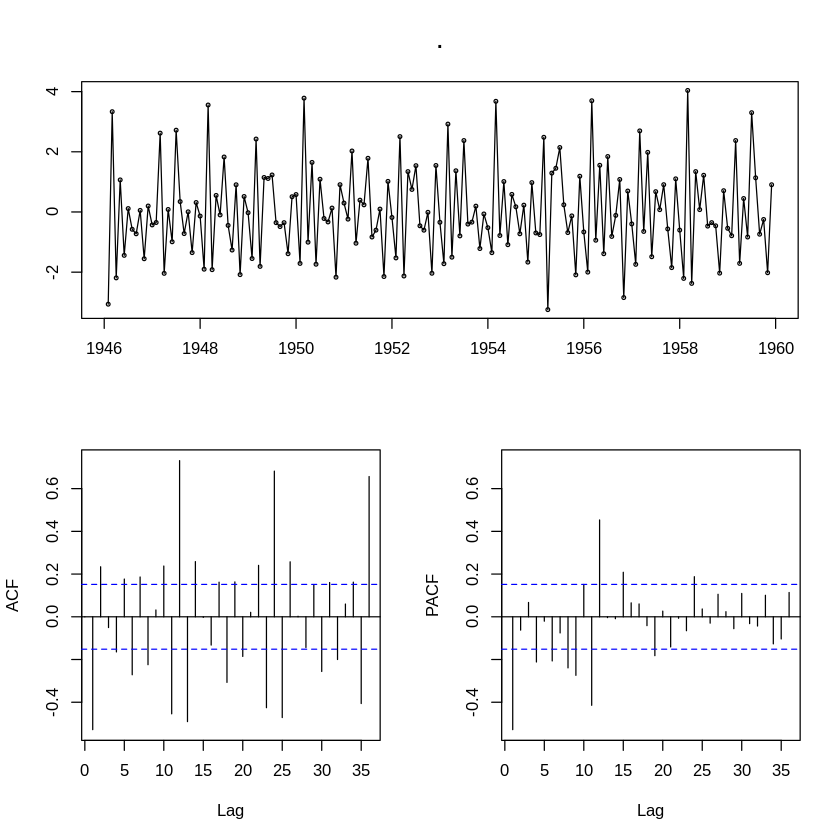

In [38]:
diff %>% tsdisplay

In [39]:
auto.arima(birth)

Series: birth 
ARIMA(2,1,2)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sma1
      0.6539  -0.4540  -0.7255  0.2532  -0.2427  -0.8451
s.e.  0.3003   0.2429   0.3227  0.2878   0.0985   0.0995

sigma^2 = 0.4076:  log likelihood = -157.45
AIC=328.91   AICc=329.67   BIC=350.21


Autocorrelations of series ‘diff’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.528  0.234 -0.050 -0.164  0.177 -0.271  0.186 -0.224  0.032  0.238 
    11     12     13     14     15     16     17     18     19     20     21 
-0.454  0.731 -0.491  0.258 -0.003 -0.132  0.162 -0.307  0.163 -0.185  0.021 
    22     23     24 
 0.241 -0.425  0.682 


Partial autocorrelations of series ‘birth’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.783  0.476  0.002 -0.131  0.153 -0.003  0.216  0.087  0.219  0.250 -0.137 
    12     13     14     15     16     17     18     19     20     21     22 
 0.426 -0.407 -0.007  0.062 -0.216 -0.032 -0.046 -0.008  0.183 -0.058  0.090 
    23     24 
-0.026  0.022 

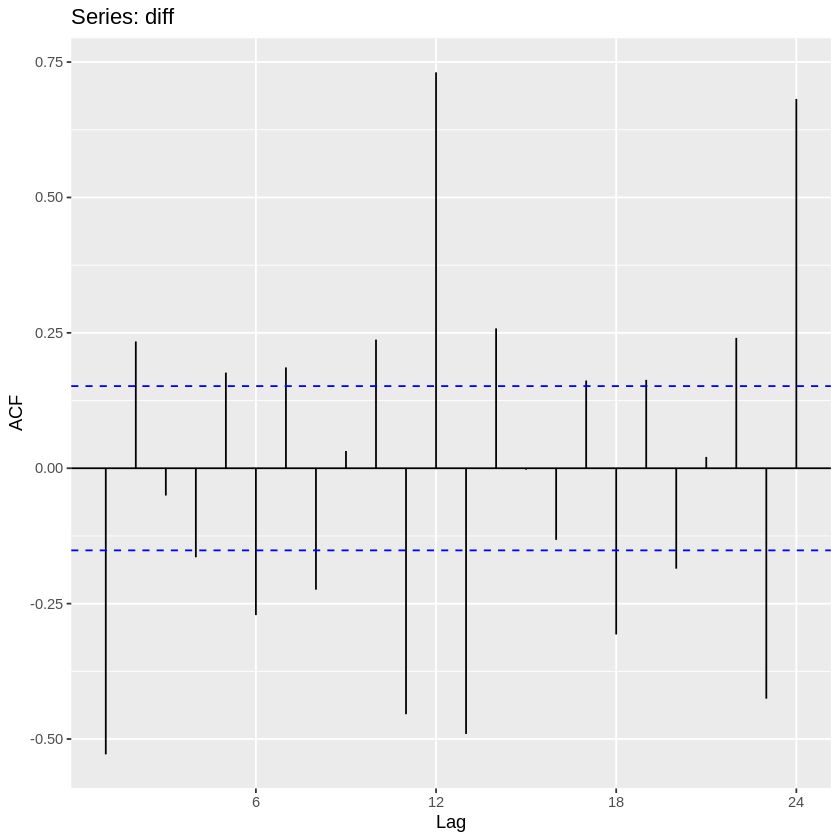

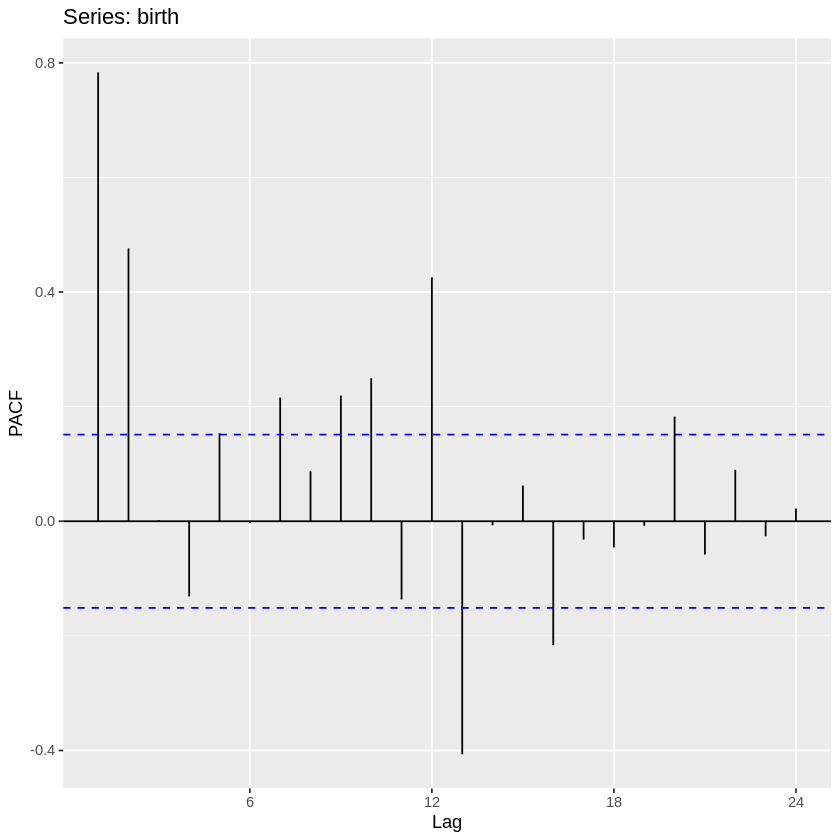

In [42]:
#step2. acf, pacf확인
Acf(diff, plot = FALSE)
ggAcf(diff)

Pacf(birth, plot = FALSE)
ggPacf(birth)



#3. 위 모델 중 한 가지 모델을 선택하고 이유를 서술
#4. 최종 예측을 하고, 결과를 평가